## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Display the data table for preview


In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, how="right", on="Mouse ID")
# Display the data table for preview
complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
len(complete_data["Mouse ID"].unique())

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
complete_data[['Mouse ID', 'Timepoint']].values.ravel()

array(['k403', 0, 'k403', ..., 40, 'z969', 45], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
dupes = complete_data['Mouse ID'].duplicated()
complete_data['Mouse ID'][dupes]
matches = complete_data['Timepoint'].isin(complete_data['Timepoint'])
complete_data['Mouse ID'][matches]

0       k403
1       k403
2       k403
3       k403
4       k403
        ... 
1888    z969
1889    z969
1890    z969
1891    z969
1892    z969
Name: Mouse ID, Length: 1893, dtype: object

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
individual_data = complete_data.drop_duplicates(subset=['Mouse ID'], keep='last')
individual_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [10]:
# Checking the number of mice in the clean DataFrame.
len(individual_data["Mouse ID"].unique())

249

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_mean = complete_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

tumor_median = complete_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

tumor_variance = complete_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

tumor_deviation = complete_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

tumor_SEM = complete_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

statistics_summary = pd.DataFrame(tumor_mean)
statistics_summary_df = statistics_summary.rename(columns={"Tumor Volume (mm3)": "tumor_mean"})

statistics_summary_df["Median"] = tumor_median
statistics_summary_df["Variance"] = tumor_variance
statistics_summary_df["Deviation"] = tumor_deviation
statistics_summary_df["SEM"] = tumor_SEM

statistics_summary_df

,tumor_mean,Median,Variance,Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
statistics_table = complete_data.groupby('Drug Regimen')
groupby_summary = statistics_table.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
groupby_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [36]:
drug_datapoints = complete_data.groupby(["Drug Regimen"]).count()['Tumor Volume (mm3)']
drug_datapoints

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

## Bar and Pie Charts

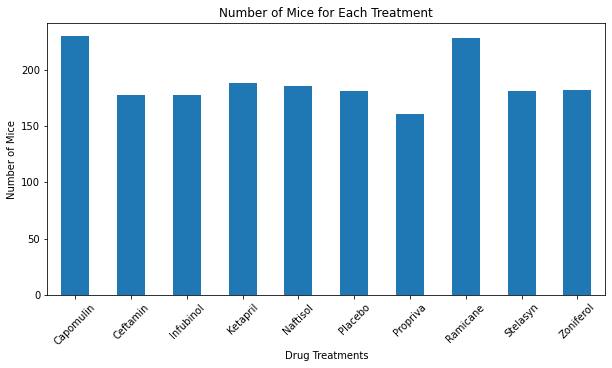

In [33]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_groups = complete_data.groupby('Drug Regimen')
treatments = drug_groups['Mouse ID'].count()

treatment_bar = treatments.plot(kind="bar", figsize=(10,5), rot=45, title="Number of Mice for Each Treatment")
treatment_bar.set_xlabel("Drug Treatments")
treatment_bar.set_ylabel("Number of Mice")

plt.show()

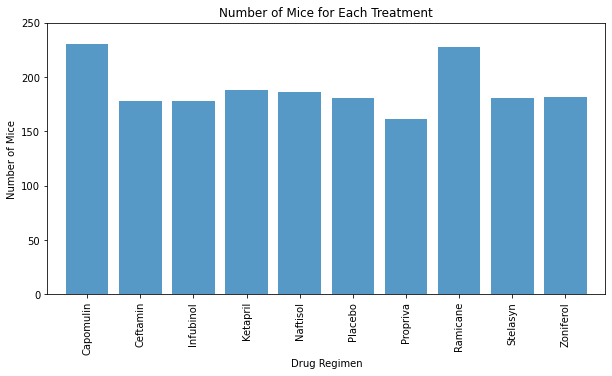

In [41]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stalasyn", "Zoniferol"]
#mice = [50, 100, 150, 200, 250]
#x_axis = np.arange(len(mice))
#tick_locations = [value for value in x_axis]

#plt.figure(figsize=(10,5))
#plt.bar(x_axis, mice, color='b', align="center")
#plt.xticks(tick_locations, drugs, rotation="vertical")
#plt.xlim(-0.75, len(x_axis)-0.25)
#plt.ylim(0, max(mice)+10)

#plt.title("Number of Mice for Each Treatment")
#plt.xlabel("Drug Treatments")
#plt.ylabel("Number of Mice")

x_axis = np.arange(len(drug_groups))
tick_location = [x for x in x_axis]

plt.figure(figsize=(10,5))

treatment_bar_two = drug_datapoints.reset_index()
treatment_bar_two

plt.bar(x_axis, drug_datapoints, alpha=0.75, align="center")
plt.xticks(tick_location, treatment_bar_two['Drug Regimen'],rotation="vertical")

plt.xlim(-0.75, len(drug_groups)-.25)
plt.ylim(0,250)

plt.title("Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()

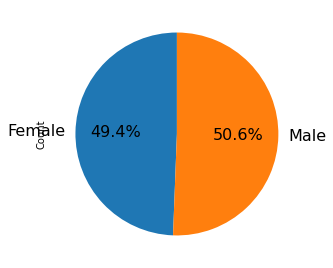

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = complete_data.groupby('Sex').count()
gender_df

gender_df = gender_df[["Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', y= "Count", ax=ax1, autopct='%.1f%%', startangle=90, shadow=False, legend = False, fontsize=16)


([<matplotlib.patches.Wedge at 0x210e9f11190>,
 [Text(-0.7887477729166414, -0.904365496201087, 'Females'),
  Text(0.7230187918402547, 0.8290017048509963, 'Males')],
 [Text(-0.46010286753470747, -0.527546539450634, '49.4%'),
  Text(0.3943738864583208, 0.4521827481005434, '50.6%')])

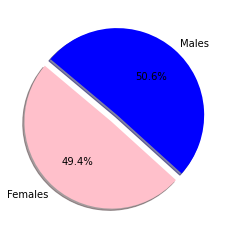

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (complete_data.groupby(["Sex"])["Age_months"].count()).tolist()
gender_count

labels = ["Females", "Males"]

colors = ["pink", "blue"]

explode = (0.1, 0)

plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)


## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cap_df = complete_data.loc[complete_data["Drug Regimen"] == "Capomulin",:]
ram_df = complete_data.loc[complete_data["Drug Regimen"] == "Ramicane", :]
inf_df = complete_data.loc[complete_data["Drug Regimen"] == "Infubinol", :]
ceft_df = complete_data.loc[complete_data["Drug Regimen"] == "Ceftamin", :]
cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
28,x401,Capomulin,Female,16,15,40,28.167397,0
17,s185,Capomulin,Female,3,17,35,28.328531,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


In [51]:
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplast
caplastmerge = pd.merge(caplast, complete_data, on=("Mouse ID", "Timepoint"), how="left")
caplastmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [52]:
tumor = caplastmerge["Tumor Volume (mm3)"]

quartiles = tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of tumor volume is: {lowerq}")
#print(f"The upper quartile of tumor volume is: {upperq}")
#print(f"The interqiartile range of tumor volume is: {iqr}")
#print(f"The median of tumor volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and aboce {upper_bound} coukd be outliers")


Capomulin potential outliers could be values below 20.70456164999999 and aboce 51.83201549 coukd be outliers


In [53]:
ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ramlast
ramlastmerge = pd.merge(ramlast, complete_data, on=("Mouse ID", "Timepoint"), how="left")
ramlastmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [54]:
ram_tumor = caplastmerge["Tumor Volume (mm3)"]

quartiles = ram_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of tumor volume is: {lowerq}")
#print(f"The upper quartile of tumor volume is: {upperq}")
#print(f"The interqiartile range of tumor volume is: {iqr}")
#print(f"The median of tumor volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramicane potential outliers could be values below {lower_bound} and aboce {upper_bound} coukd be outliers")


Ramicane potential outliers could be values below 20.70456164999999 and aboce 51.83201549 coukd be outliers


In [55]:
inflast = inf_df.groupby('Mouse ID').max()['Timepoint']
inflast
inflastmerge = pd.merge(inflast, complete_data, on=("Mouse ID", "Timepoint"), how="left")
inflastmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [56]:
inf_tumor = caplastmerge["Tumor Volume (mm3)"]

quartiles = inf_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of tumor volume is: {lowerq}")
#print(f"The upper quartile of tumor volume is: {upperq}")
#print(f"The interqiartile range of tumor volume is: {iqr}")
#print(f"The median of tumor volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol potential outliers could be values below {lower_bound} and aboce {upper_bound} coukd be outliers")


Infubinol potential outliers could be values below 20.70456164999999 and aboce 51.83201549 coukd be outliers


In [57]:
ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftlast
ceftlastmerge = pd.merge(ceftlast, complete_data, on=("Mouse ID", "Timepoint"), how="left")
ceftlastmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [58]:
ceft_tumor = caplastmerge["Tumor Volume (mm3)"]

quartiles = ceft_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of tumor volume is: {lowerq}")
#print(f"The upper quartile of tumor volume is: {upperq}")
#print(f"The interqiartile range of tumor volume is: {iqr}")
#print(f"The median of tumor volume is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin potential outliers could be values below {lower_bound} and aboce {upper_bound} coukd be outliers")

Ceftamin potential outliers could be values below 20.70456164999999 and aboce 51.83201549 coukd be outliers


In [57]:
# Put treatments into a list for for loop (and later for plot labels)




# Calculate the IQR and quantitatively determine if there are any potential outliers. 



    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

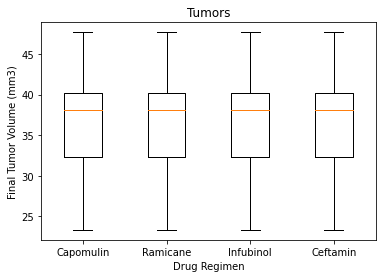

In [59]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumors_plot = [tumor, ram_tumor, inf_tumor, ceft_tumor]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(tumors_plot, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [41]:
forline_df = cap_df.loc[cap_df["Mouse ID"] == "b128",:]
forline_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2


In [60]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
x_axisTP = forline_df["Timepoint"]
tumor_size = forline_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatment of mouse b128')
plt.plot(x_axis, tumor_size,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

NameError: name 'forline_df' is not defined

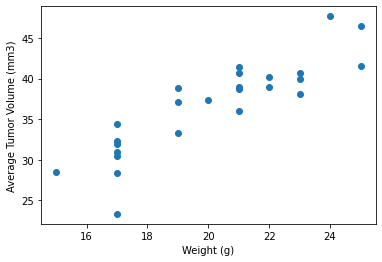

In [43]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

## Correlation and Regression

In [46]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capavg['Weight (g)'], capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.88


In [48]:
model = st.linregress(capavg['Weight (g)'], capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=1.750468228958504, intercept=1.4481469525549002, rvalue=0.8767060403658119, pvalue=9.0844290886732e-09, stderr=0.20026513236453639)

In [52]:
mslope = 1.750468228958504
bintercept = 1.4481469525549002

<function matplotlib.pyplot.show(*args, **kw)>

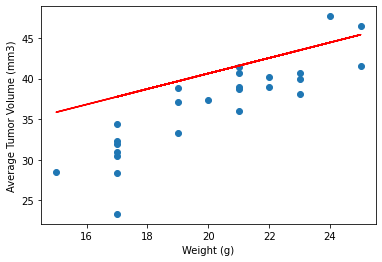

In [54]:
y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('linearregression')
plt.show